In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_curve, auc, precision_recall_curve, 
                           average_precision_score, accuracy_score,
                           precision_score, recall_score, f1_score,
                           roc_auc_score)
from sklearn.preprocessing import label_binarize

Training data shape: (60000, 784)
Test data shape: (10000, 784)


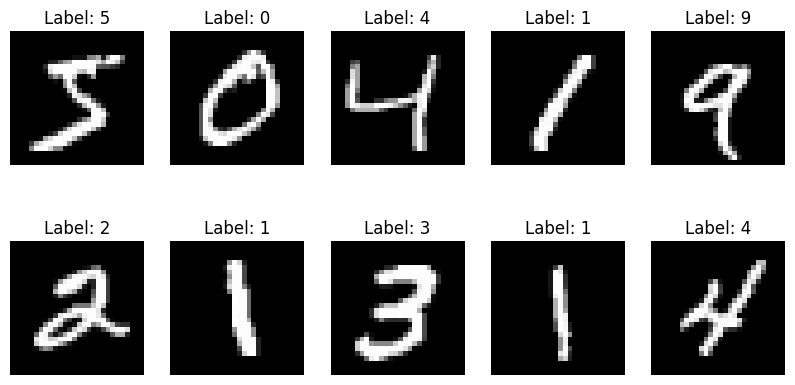

In [4]:
# 1. Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# EDA
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()

In [16]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# 2. Model Building
def build_mnist_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:
# 3. Training with different learning rates
lrs = [0.01, 0.001]
histories = []

for lr in lrs:
    print(f"\nTraining with learning rate: {lr}")
    model = build_mnist_model()
    model.compile(
        optimizer=SGD(learning_rate=lr),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=128,
        verbose=1
    )
    histories.append(history)


Training with learning rate: 0.01


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.4830 - loss: 1.7286 - val_accuracy: 0.8654 - val_loss: 0.5980
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8188 - loss: 0.6550 - val_accuracy: 0.8958 - val_loss: 0.4015
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8582 - loss: 0.4930 - val_accuracy: 0.9072 - val_loss: 0.3419
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8752 - loss: 0.4269 - val_accuracy: 0.9146 - val_loss: 0.3067
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8872 - loss: 0.3878 - val_accuracy: 0.9192 - val_loss: 0.2842
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8978 - loss: 0.3594 - val_accuracy: 0.9238 - val_loss: 0.2673
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9009 - loss: 0.3426 - val_accuracy: 0.9274 - val_loss: 0.2530
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9088 - loss: 0.3170 - val_ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Evaluation for Learning Rate = 0.01

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.94      0.94       892
           6       0.95      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.96      0.93      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



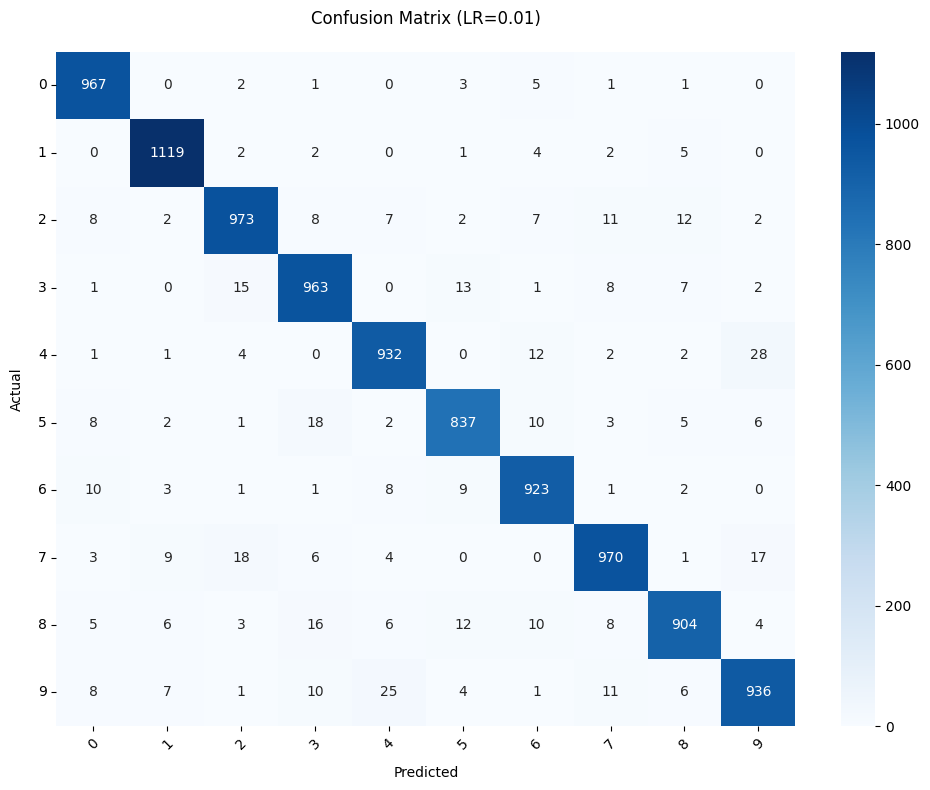

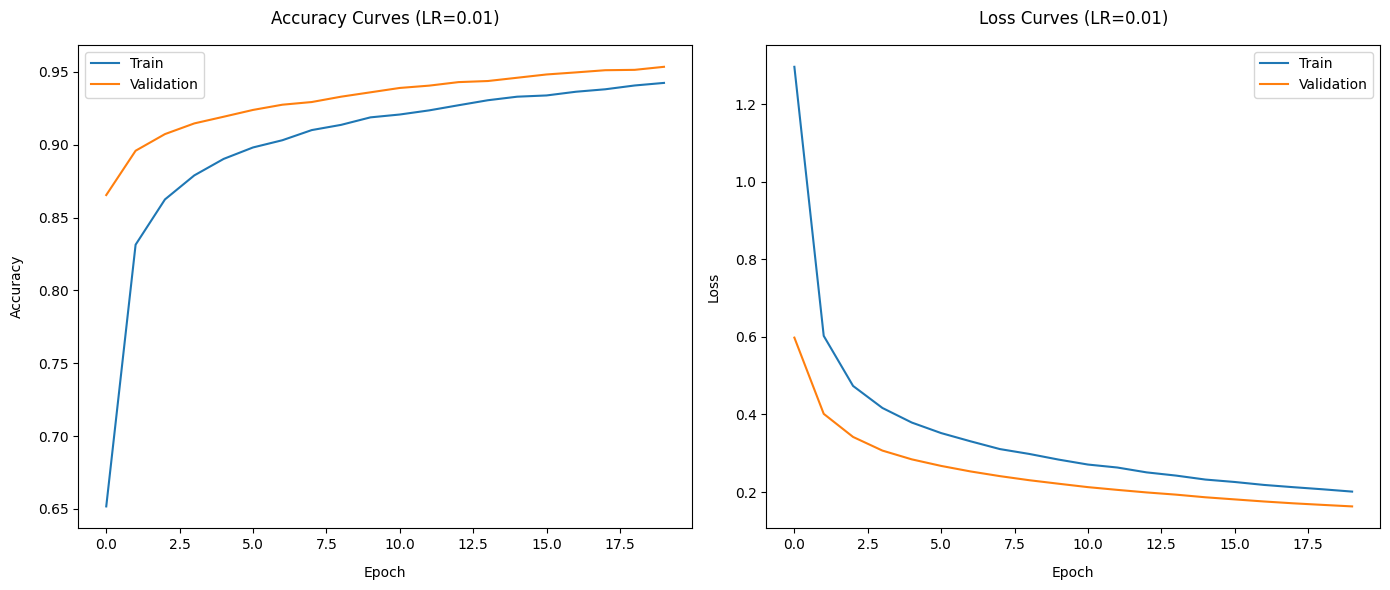

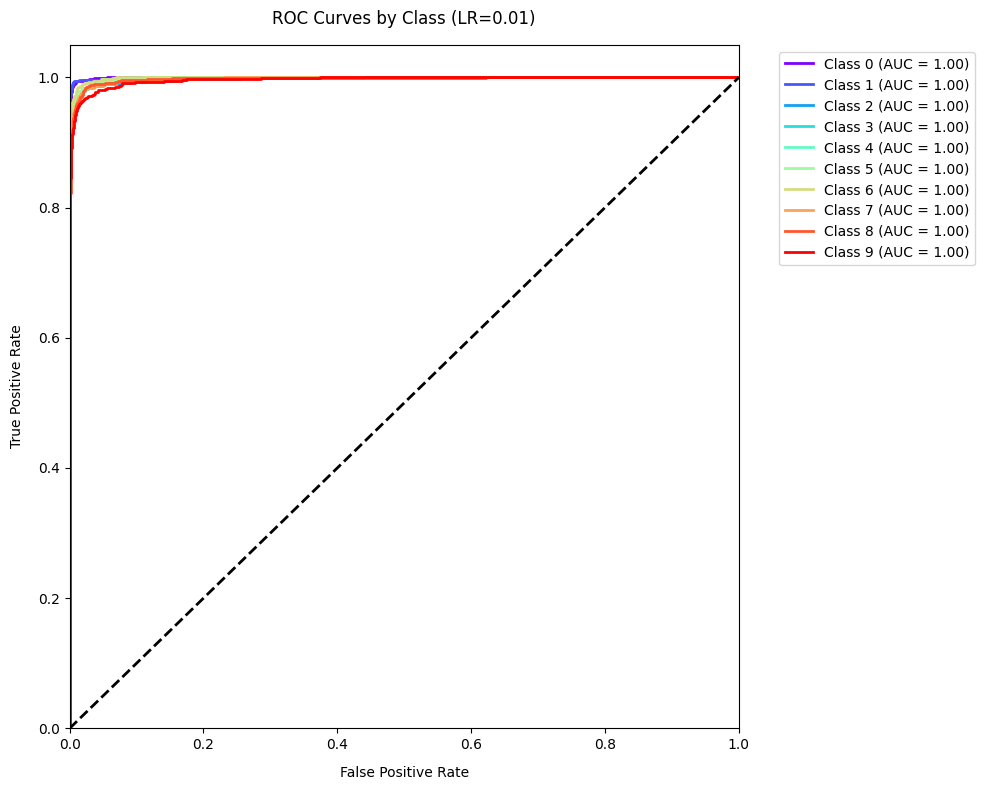

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluation for Learning Rate = 0.001

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.98      0.96      1135
           2       0.91      0.86      0.88      1032
           3       0.87      0.88      0.88      1010
           4       0.89      0.89      0.89       982
           5       0.88      0.81      0.85       892
           6       0.90      0.92      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.85      0.84      0.85       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



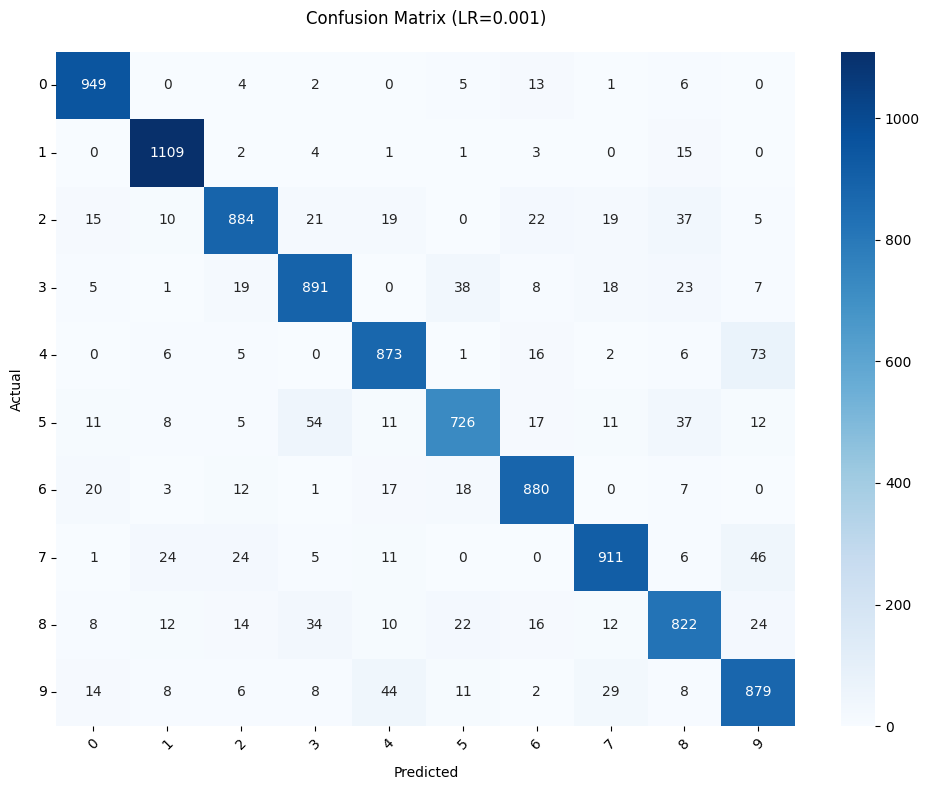

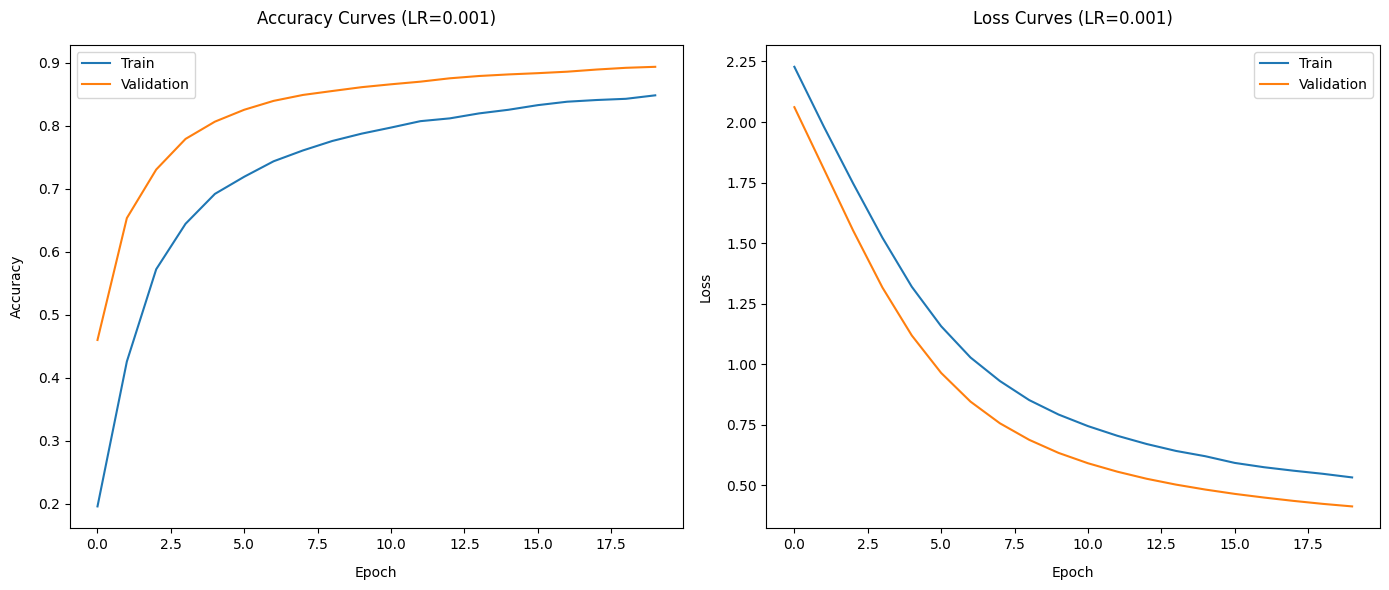

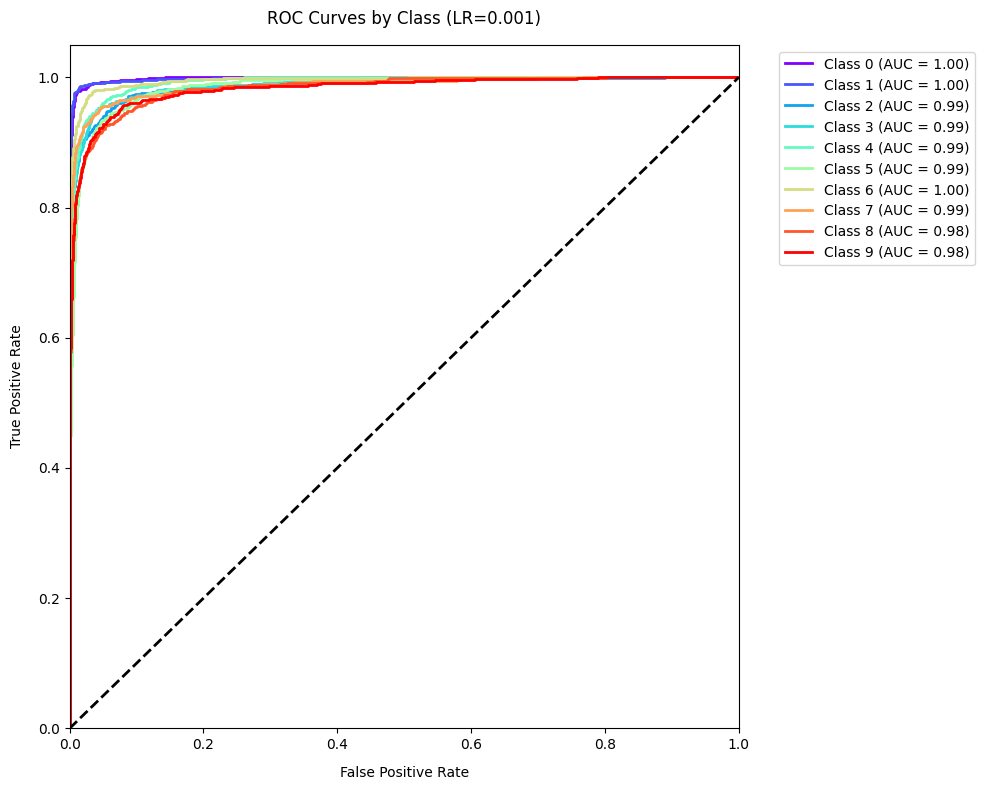

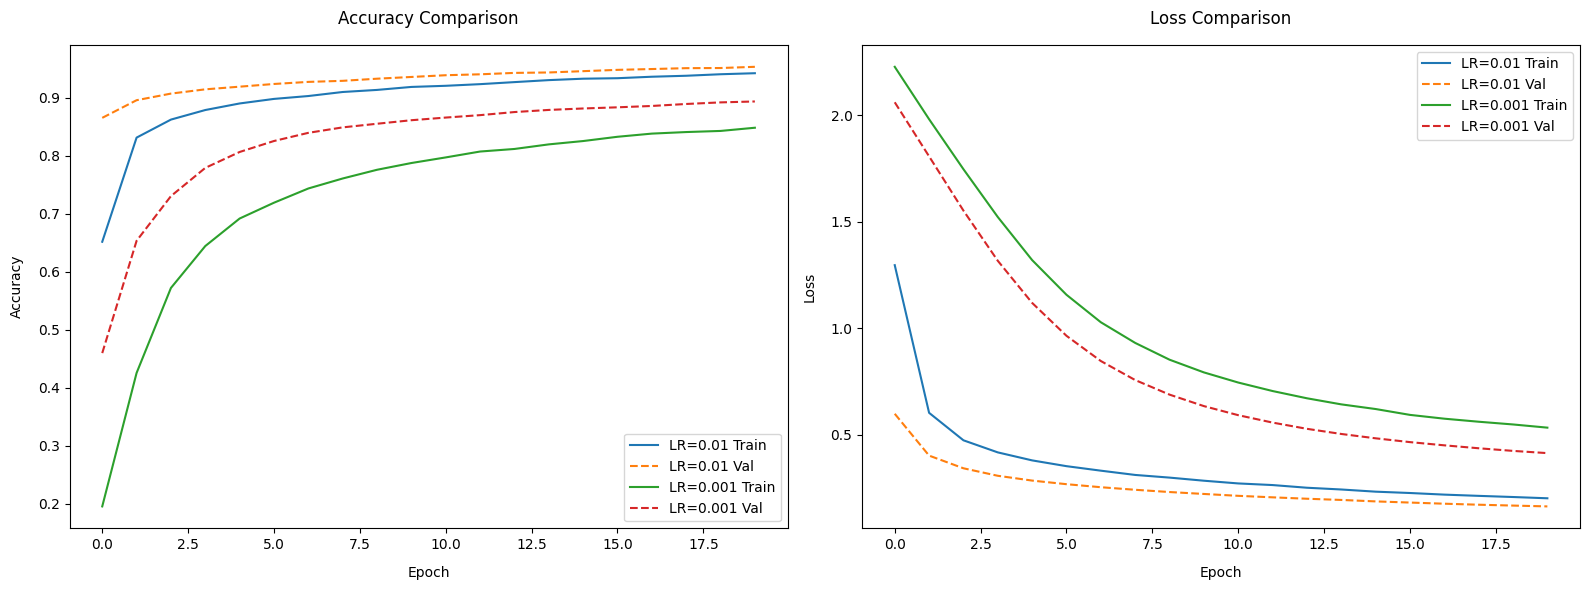

<Figure size 1200x600 with 0 Axes>

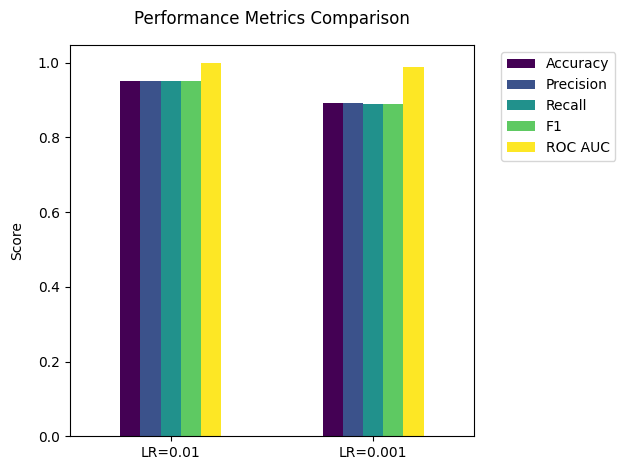

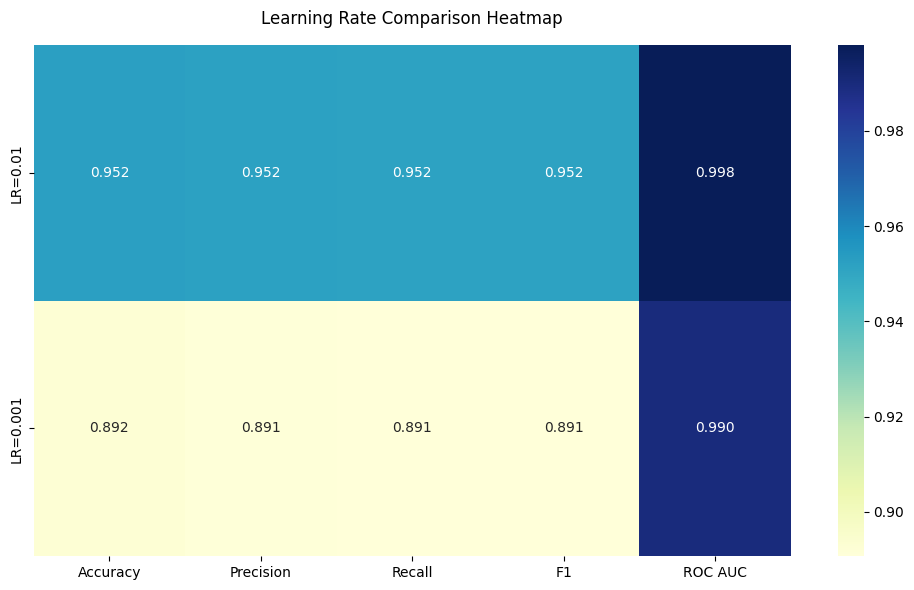

In [23]:
# 1. Individual Model Evaluation Function
def enhanced_mnist_evaluation(model, history, X_test, y_test, lr):
    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Classification Report
    print(f"\n{'='*40}\nEvaluation for Learning Rate = {lr}\n{'='*40}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix (LR={lr})', pad=20)
    plt.xlabel('Predicted', labelpad=10)
    plt.ylabel('Actual', labelpad=10)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Accuracy/Loss Curves
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Accuracy Curves (LR={lr})', pad=15)
    plt.ylabel('Accuracy', labelpad=10)
    plt.xlabel('Epoch', labelpad=10)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Loss Curves (LR={lr})', pad=15)
    plt.ylabel('Loss', labelpad=10)
    plt.xlabel('Epoch', labelpad=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # ROC-AUC Curves
    y_test_bin = label_binarize(y_true, classes=range(10))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))
    for i, color in zip(range(10), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', labelpad=10)
    plt.ylabel('True Positive Rate', labelpad=10)
    plt.title(f'ROC Curves by Class (LR={lr})', pad=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': f1_score(y_true, y_pred, average='macro'),
        'ROC AUC': roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
    }

# 2. Evaluate both models
eval_lr01 = enhanced_mnist_evaluation(histories[0].model, histories[0], X_test, y_test, 0.01)
eval_lr001 = enhanced_mnist_evaluation(histories[1].model, histories[1], X_test, y_test, 0.001)

# 3. Comparative Analysis
metrics_df = pd.DataFrame({
    'LR=0.01': eval_lr01,
    'LR=0.001': eval_lr001
}).T

# Combined Training Curves
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(histories[0].history['accuracy'], label='LR=0.01 Train')
plt.plot(histories[0].history['val_accuracy'], '--', label='LR=0.01 Val')
plt.plot(histories[1].history['accuracy'], label='LR=0.001 Train')
plt.plot(histories[1].history['val_accuracy'], '--', label='LR=0.001 Val')
plt.title('Accuracy Comparison', pad=15)
plt.ylabel('Accuracy', labelpad=10)
plt.xlabel('Epoch', labelpad=10)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(histories[0].history['loss'], label='LR=0.01 Train')
plt.plot(histories[0].history['val_loss'], '--', label='LR=0.01 Val')
plt.plot(histories[1].history['loss'], label='LR=0.001 Train')
plt.plot(histories[1].history['val_loss'], '--', label='LR=0.001 Val')
plt.title('Loss Comparison', pad=15)
plt.ylabel('Loss', labelpad=10)
plt.xlabel('Epoch', labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

# Metrics Comparison Bar Plot
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', colormap='viridis')
plt.title('Performance Metrics Comparison', pad=15)
plt.ylabel('Score', labelpad=10)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Metrics Comparison Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Learning Rate Comparison Heatmap', pad=15)
plt.tight_layout()
plt.show()